# Exercício 1

Na análise de concessão de empréstimos, uma variável potencialmente 
importante é a renda da pessoa. O gerente de um banco coleta uma base de 
dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 
pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma 
análise por meio de tabela de frequências. Neste sentido, pede-se:  
a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 
4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.   
b) Em seguida, elabore a tabela de frequências para as faixas de renda acima. 

In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando o arquivo Excel
arquivo = "Lista-de-Exercicios.xlsx"
df = pd.read_excel(arquivo, sheet_name="Exercício 1", usecols="B", skiprows=1)
df.columns = ['Renda (R$)']  # Renomeando a coluna

In [3]:
# Definindo as faixas de renda
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
labels = ['0-2.000', '2.001-4.000', '4.001-6.000', '6.001-8.000', '8.001-10.000', '10.001-12.000']

In [4]:
# Criando a coluna de faixas
df['Faixa de Renda'] = pd.cut(df['Renda (R$)'], bins=bins, labels=labels, right=True)

In [11]:
# Tabela de frequências
frequencia_abs = df['Faixa de Renda'].value_counts(sort=False)
frequencia_rel = (frequencia_abs / frequencia_abs.sum()).round(2)

# Acumuladas
freq_abs_ac = frequencia_abs.cumsum()
freq_rel_ac = (freq_abs_ac / frequencia_abs.sum() * 100).round(0)

In [12]:
# Criar tabela final
tabela = pd.DataFrame({
    'Frequência Absoluta': frequencia_abs,
    'Frequência Relativa': frequencia_rel,
    'Freq. Absoluta Acumulada': freq_abs_ac,
    'Freq. Relativa Acumulada (%)': freq_rel_ac
})
tabela.index.name = 'Faixa de Renda'
tabela.reset_index(inplace=True)

In [13]:
# Exibir a tabela
tabela

,Faixa de Renda,Frequência Absoluta,Frequência Relativa,Freq. Absoluta Acumulada,Freq. Relativa Acumulada (%)
0,0-2.000,9,0.18,9,18.0
1,2.001-4.000,18,0.37,27,55.0
2,4.001-6.000,11,0.22,38,78.0
3,6.001-8.000,5,0.10,43,88.0
4,8.001-10.000,4,0.08,47,96.0
5,10.001-12.000,2,0.04,49,100.0


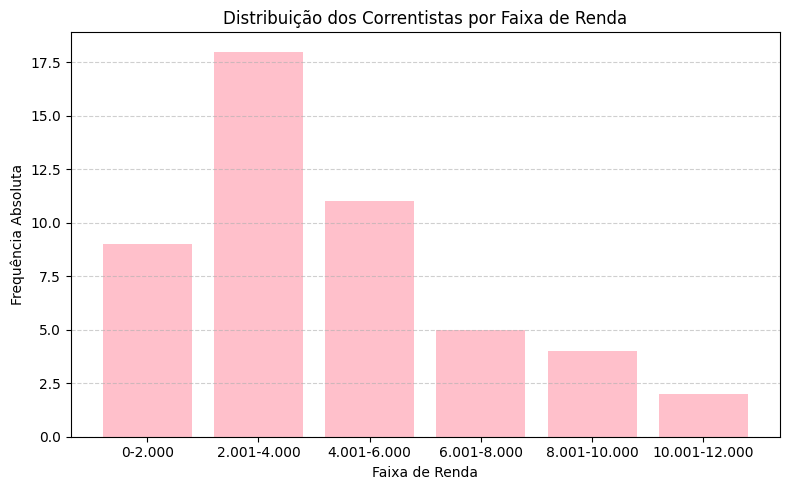

In [20]:
# Gráfico 
plt.figure(figsize=(8,5))
plt.bar(tabela['Faixa de Renda'], tabela['Frequência Absoluta'], color='pink')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência Absoluta')
plt.title('Distribuição dos Correntistas por Faixa de Renda')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()